# 最近邻算法
# 一个预测点找出距离其最近的点的类别，则预测点属于该点的类别
# k阶邻算法
# 一个预测点找出周围最近的k个点，k个点中哪一个类别数量最多，则预测点属于该类别

#算法具体流程
    数据准备：清洗数据，将数据转换为向量
    计算测试集和训练集之间的距离
    寻找邻居，找出与测试集最近的k个训练集样本
    根据决策规则，从k个邻居得出测试集类型

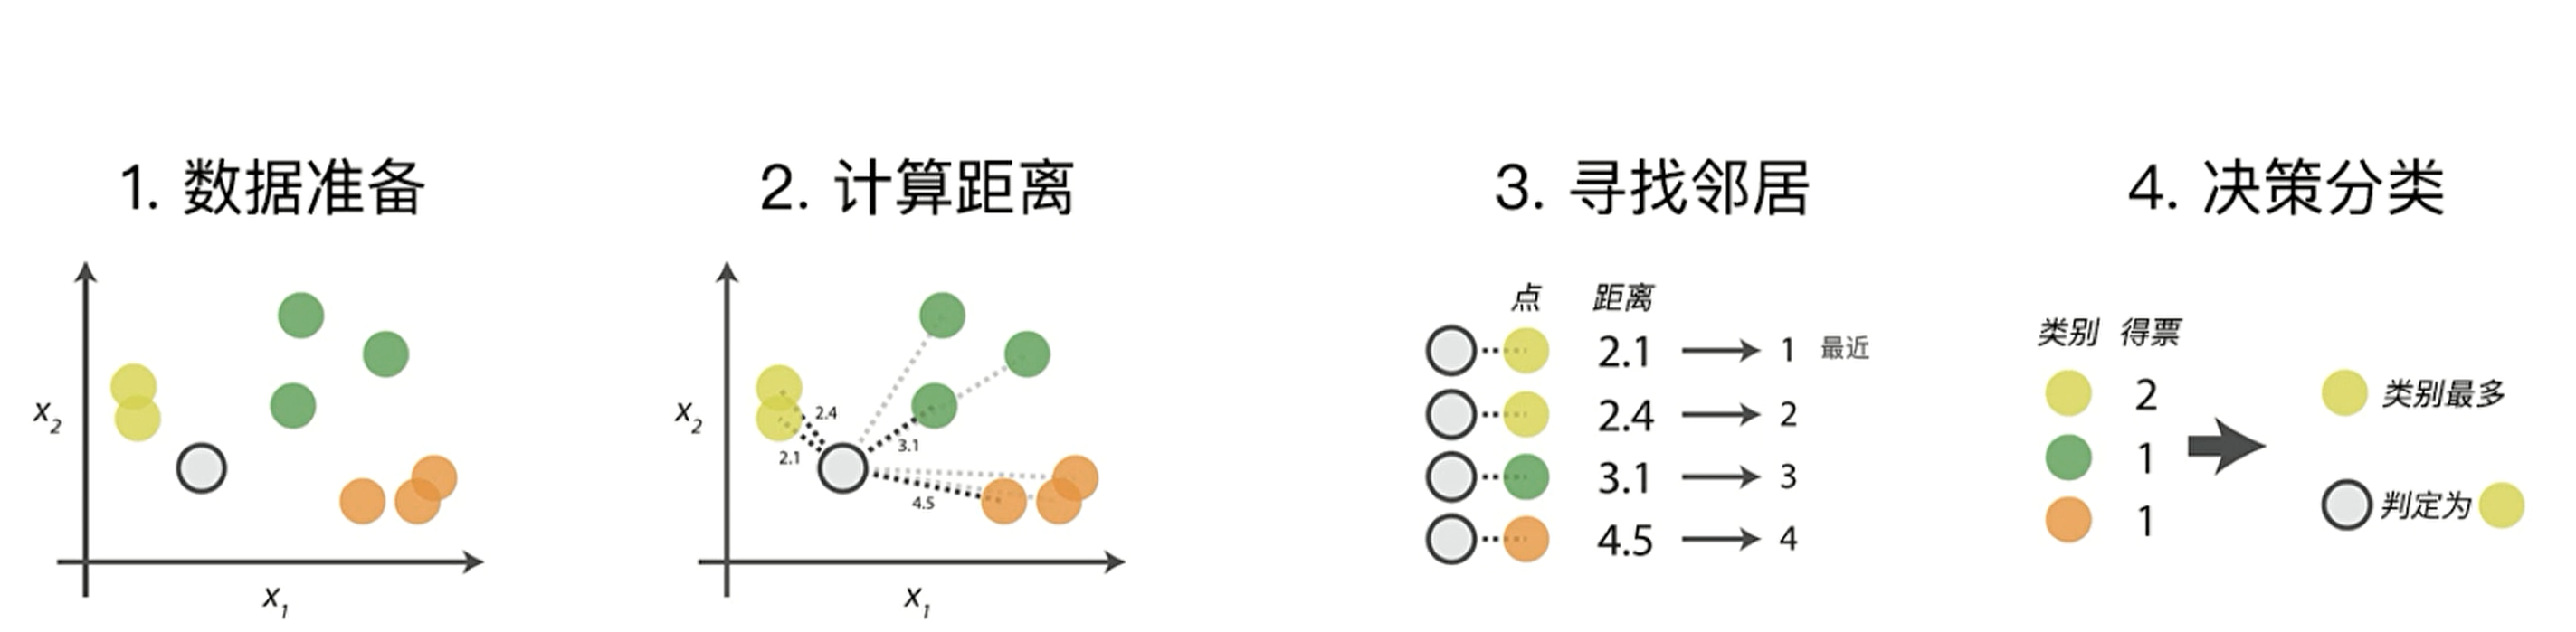

In [49]:
import numpy as np 
def create_f():
    feature = np.array([[2.88,3.05],[3.1,2.45],[3.05,2.8],[2.9,2.7],[2.75,3.4],[3.23,2.9],
                       [3.2,3.75],[3.5,2.9],[3.65,3.6],[3.35,3.3]])
    label = ['A','A','A','A','A','B','B','B','B','B']
    return feature,label

In [50]:
feature , label = create_f()
test =[3.18,3.15]
print(feature,label)

[[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]] ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


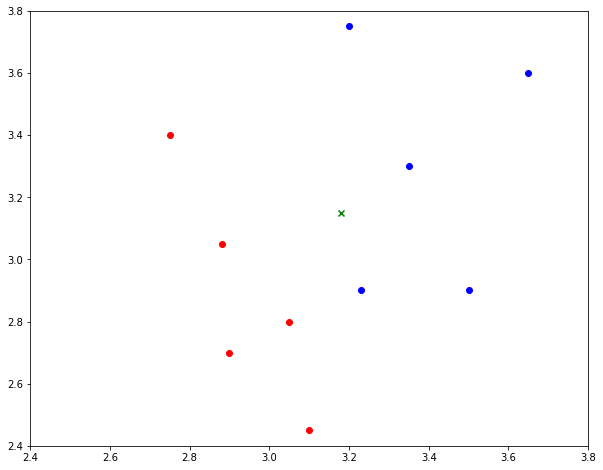

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlim((2.4,3.8))
plt.ylim((2.4,3.8))

x_f = list(map(lambda x:x[0],feature))  
y_f = list(map(lambda y:y[1],feature))
plt.scatter(x_f[:5],y_f[:5],c='red')
plt.scatter(x_f[5:],y_f[5:],c='blue')
plt.scatter(test[0],test[1],c='g',marker='x')

距离求解

<img src="./img/距离求解.png" style="zoom:50%" />

In [52]:
# 使用曼哈顿距离
def man_d(x,y):
    return np.sum(np.abs(x-y))

In [53]:
x = np.array([3.1,3.2])
y = np.array([2.5,2.8])
dis = man_d(x,y)
dis

1.0000000000000004

In [54]:
# 欧氏距离
def o_d(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [55]:
x = np.random.random(10)
y = np.random.random(10)
x,y,o_d(x,y)

(array([0.42268075, 0.35366901, 0.72422385, 0.17028515, 0.28742644,
        0.34404519, 0.38024871, 0.8146493 , 0.77998146, 0.80645784]),
 array([0.84945128, 0.47705209, 0.27578675, 0.42384214, 0.04508176,
        0.88641521, 0.49023797, 0.44623044, 0.57609018, 0.64441582]),
 1.0155289274028196)

In [56]:
# 决策规则
#   多数表决法:周围那个类别数量多,预测点为哪个分类
import operator 

def majority_voting(count):
    return sorted(count.items(),key=operator.itemgetter(1),reverse=True)

arr = {'A':3,'B':2,'C':6,"D":5}
majority_voting(arr)
    

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In [57]:
# 实现knn算法
# test是预测点
# train是训练点(多个)
# label是训练点的类别
def knn_self(test,train,label,k):
#   训练集的每个点与测试点的距离
    distance = np.array([])
    
#   用于生成一个{类别：数量}的字典  如：{'A':3,'B':2,'C':6,"D":5}    
    class_count = {}

    for each in train:
#       训练集的每个点与测试点的距离        
        d = o_d(test,each)
#       添加到distance中
        distance = np.append(distance,d)


#   计算一个半径r 包含k个点   用于后面可视化显示  Note:  distance[k]是第k+1个点的距离
    sorted_dis_index = distance.argsort()
    sorted_dis = np.sort(distance)
    r = (sorted_dis[k]+sorted_dis[k-1])/2
    
    for i in range(k):
#       统计k个临近点的类别和数量        
#       获取训练点的类别
        label_name = label[sorted_dis_index[i]]
        class_count[label_name] = class_count.get(label_name,0) + 1
#     对class_count使用投票决策
    class_count_final = majority_voting(class_count)
    return class_count_final ,r
        

In [58]:
test = np.array([3.18,3.15])
final_label , r = knn_self(test,feature,label,5)
final_label

[('B', 3), ('A', 2)]

In [59]:
def circle(r,a,b):
    theta = np.arange(0,2*np.pi,0.01)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    return x,y

In [60]:
k_x,k_y = circle(r,3.18,3.15)

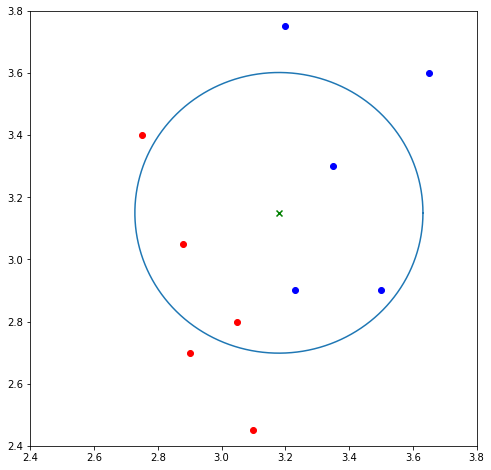

In [61]:
plt.figure(figsize=(8,8))
plt.xlim(2.4,3.8)
plt.ylim(2.4,3.8)
x_f = list(map(lambda x:x[0],feature))  
y_f = list(map(lambda y:y[1],feature))
plt.scatter(x_f[:5],y_f[:5],c='red')
plt.scatter(x_f[5:],y_f[5:],c='blue')
plt.scatter(test[0],test[1],c='g',marker='x')
plt.plot(k_x,k_y)

In [69]:
import pandas as pd 

data = pd.read_csv('syringa.csv')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,2.4,2.1,daphne
1,4.9,3.0,2.7,1.7,daphne
2,4.7,3.2,2.2,1.4,daphne
3,4.6,3.1,1.6,1.7,daphne
4,5.0,3.6,1.6,1.4,daphne


In [75]:
# fig , axes = plt.subplots(2,3,figsize=(20,10))

# axes[0,0].set_xlabel('sepal_length')
# axes[0,0].set_ylabel("sepal_width")
# axes[0,0].scatter(data.sepal_length[:50],data.sepal_width[:50],c='b')
# axes[0,0].scatter(data.sepal_length[50:100],data.sepal_width[50:100],c='g')
# axes[0,0].scatter(data.sepal_length[100:150],data.sepal_width[100:150],c='r')
# axes[0,0].legend(['daphne', 'syringa', 'willow '],loc=2)

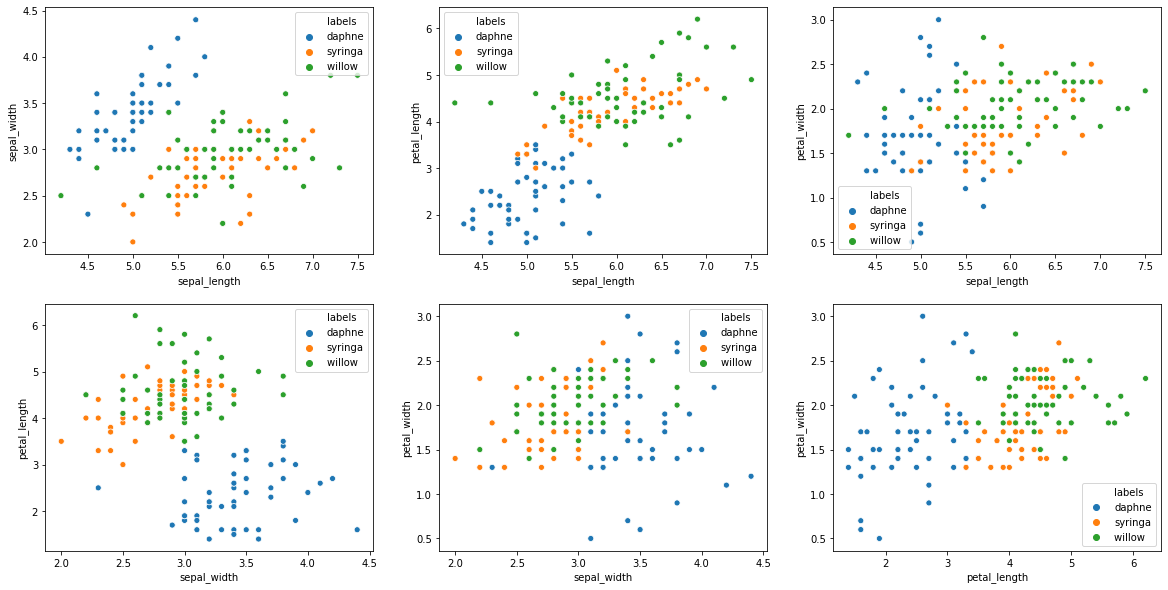

In [86]:
import seaborn as sns
f = plt.figure(figsize=(20,10))
f.add_subplot(2,3,1)
sns.scatterplot(data.sepal_length,data.sepal_width,hue=data.labels)
f.add_subplot(2,3,2)
sns.scatterplot(data.sepal_length,data.petal_length,hue=data.labels)
f.add_subplot(2,3,3)
sns.scatterplot(data.sepal_length,data.petal_width,hue=data.labels)
f.add_subplot(2,3,4)
sns.scatterplot(data.sepal_width,data.petal_length,hue=data.labels)
f.add_subplot(2,3,5)
sns.scatterplot(data.sepal_width,data.petal_width,hue=data.labels)
f.add_subplot(2,3,6)
sns.scatterplot(data.petal_length,data.petal_width,hue=data.labels)

In [87]:
from sklearn.model_selection import train_test_split

feature = data.iloc[:,:-1] 
labels = data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(feature,labels,test_size=0.3,random_state=2)

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,4.9,1.4
28,5.2,3.4,2.6,3.0
65,6.7,3.1,4.4,2.3
0,5.1,3.5,2.4,2.1
27,5.2,3.5,3.1,1.6


In [100]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model(X_train,y_train,X_test,y_test,knum):
    clf = KNeighborsClassifier(n_neighbors=knum) #algorithm 可以设置不同算法
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print('kum=',i,'score=',score)
    return score


kum= 2 score= 0.7555555555555555
kum= 3 score= 0.7777777777777778
kum= 4 score= 0.8666666666666667
kum= 5 score= 0.7777777777777778
kum= 6 score= 0.8666666666666667
kum= 7 score= 0.8
kum= 8 score= 0.8222222222222222
kum= 9 score= 0.8222222222222222
kum= 10 score= 0.7777777777777778


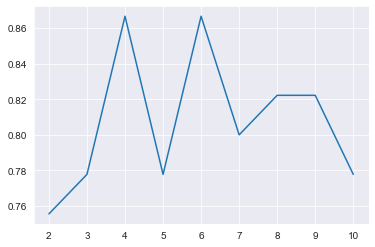

In [105]:
arr = []
for i in range(2,11):
    arr.append(knn_model(X_train,y_train,X_test,y_test,i))
sns.set_style("darkgrid")
sns.lineplot(range(2,11),arr)
# 为避免过拟合，选择k=4而不选择k=6